<a href="https://colab.research.google.com/github/a123700/Leo/blob/master/Variational_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
api_token = {"username":"srhgccc","key":"41c36ccc1ee7bc07f70e459ccbf7df7c"}
import json
import zipfile
import os
 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip intel-image-classification.zip

串流輸出內容已截斷至最後 5000 行。
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating: seg_train/seg

In [ ]:
img_size = 60
num_channels = 3

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import keras
from keras import backend as K
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Reshape, BatchNormalization
from keras.models import Model
import tensorflow
from tqdm import tqdm
import cv2     
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
def process_data(DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        img = img[:, :, [2,1,0]]
        if img is None:
            print('Wrong path:', path)
            continue
        else:
            img = cv2.resize(img, (img_size, img_size))
            res.append(np.array(img))

In [ ]:
dir = 'seg_train/seg_train/'

In [ ]:
import os
category = os.listdir(dir)
print(category)

['forest', 'street', 'buildings', 'sea', 'glacier', 'mountain']


In [ ]:
res = []
for i in category:
    process_data(dir + i)
    print(len(res))

100%|██████████| 2271/2271 [00:02<00:00, 1042.62it/s]


2271


100%|██████████| 2382/2382 [00:01<00:00, 1197.79it/s]


4653


100%|██████████| 2191/2191 [00:01<00:00, 1190.47it/s]


6844


100%|██████████| 2274/2274 [00:01<00:00, 1250.43it/s]


9118


100%|██████████| 2404/2404 [00:01<00:00, 1209.14it/s]


11522


100%|██████████| 2512/2512 [00:02<00:00, 1242.12it/s]

14034


In [ ]:
res = np.array(res)
res = res/255

In [ ]:
x_train, x_test = train_test_split(res, test_size=0.25,random_state=12345)

In [ ]:
x = tensorflow.keras.layers.Input(shape=(img_size, img_size, num_channels), name="encoder_input")

In [ ]:
encoder_conv_layer1 = tensorflow.keras.layers.Conv2D(filters=3, kernel_size=(3, 3), padding="same", strides=1, name="encoder_conv_1")(x)
encoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_1")(encoder_conv_layer1)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_norm_layer1)

encoder_conv_layer2 = tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_2")(encoder_activ_layer1)
encoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_2")(encoder_conv_layer2)
encoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_2")(encoder_norm_layer2)

encoder_conv_layer3 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_3")(encoder_activ_layer2)
encoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_3")(encoder_conv_layer3)
encoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_3")(encoder_norm_layer3)

encoder_conv_layer4 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=2, name="encoder_conv_4")(encoder_activ_layer3)
encoder_norm_layer4 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_4")(encoder_conv_layer4)
encoder_activ_layer4 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_4")(encoder_norm_layer4)

encoder_conv_layer5 = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", strides=1, name="encoder_conv_5")(encoder_activ_layer4)
encoder_norm_layer5 = tensorflow.keras.layers.BatchNormalization(name="encoder_norm_5")(encoder_conv_layer5)
encoder_activ_layer5 = tensorflow.keras.layers.LeakyReLU(name="encoder_activ_layer_5")(encoder_norm_layer5)

In [ ]:
shape_before_flatten = tensorflow.keras.backend.int_shape(encoder_activ_layer5)[1:]
encoder_flatten = tensorflow.keras.layers.Flatten()(encoder_activ_layer5)

In [ ]:
shape_before_flatten

(15, 15, 64)

In [ ]:
latent_space_dim = 30

encoder_mu = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_mu")(encoder_flatten)
encoder_log_variance = tensorflow.keras.layers.Dense(units=latent_space_dim, name="encoder_log_variance")(encoder_flatten)

In [ ]:
def sampling(mu_log_variance):
    mu, log_variance = mu_log_variance
    epsilon = tensorflow.keras.backend.random_normal(shape=tensorflow.keras.backend.shape(mu), mean=0.0, stddev=1.0)
    random_sample = mu + tensorflow.keras.backend.exp(log_variance/2) * epsilon
    return random_sample

In [ ]:
encoder_output = tensorflow.keras.layers.Lambda(sampling, name="encoder_output")([encoder_mu, encoder_log_variance])

In [ ]:
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

In [ ]:
encoder.summary()

Model: "encoder_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 60, 60, 3)]  0           []                               
                                                                                                  
 encoder_conv_1 (Conv2D)        (None, 60, 60, 3)    84          ['encoder_input[0][0]']          
                                                                                                  
 encoder_norm_1 (BatchNormaliza  (None, 60, 60, 3)   12          ['encoder_conv_1[0][0]']         
 tion)                                                                                            
                                                                                                  
 encoder_leakyrelu_1 (LeakyReLU  (None, 60, 60, 3)   0           ['encoder_norm_1[0][0

In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(latent_space_dim), name="decoder_input")

In [ ]:
decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=np.prod(shape_before_flatten), name="decoder_dense_1")(decoder_input)

In [ ]:
decoder_reshape = tensorflow.keras.layers.Reshape(target_shape=shape_before_flatten)(decoder_dense_layer1)

In [ ]:
decoder_conv_tran_layer1 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_1")(decoder_reshape)
decoder_norm_layer1 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_1")(decoder_conv_tran_layer1)
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_norm_layer1)

decoder_conv_tran_layer2 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_2")(decoder_activ_layer1)
decoder_norm_layer2 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_2")(decoder_conv_tran_layer2)
decoder_activ_layer2 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_norm_layer2)

decoder_conv_tran_layer3 = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3, 3), padding="same", strides=2, name="decoder_conv_tran_3")(decoder_activ_layer2)
decoder_norm_layer3 = tensorflow.keras.layers.BatchNormalization(name="decoder_norm_3")(decoder_conv_tran_layer3)
decoder_activ_layer3 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_3")(decoder_norm_layer3)

decoder_conv_tran_layer4 = tensorflow.keras.layers.Conv2DTranspose(filters=3, kernel_size=(3, 3), padding="same", strides=1, name="decoder_conv_tran_4")(decoder_activ_layer3)
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_output")(decoder_conv_tran_layer4 )

In [ ]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")

In [ ]:
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 30)]              0         
                                                                 
 decoder_dense_1 (Dense)     (None, 14400)             446400    
                                                                 
 reshape (Reshape)           (None, 15, 15, 64)        0         
                                                                 
 decoder_conv_tran_1 (Conv2D  (None, 15, 15, 64)       36928     
 Transpose)                                                      
                                                                 
 decoder_norm_1 (BatchNormal  (None, 15, 15, 64)       256       
 ization)                                                        
                                                                 
 decoder_leakyrelu_1 (LeakyR  (None, 15, 15, 64)     

In [ ]:
vae_input = tensorflow.keras.layers.Input(shape=(img_size, img_size, num_channels), name="VAE_input")

In [ ]:
vae_encoder_output = encoder(vae_input)
vae_decoder_output = decoder(vae_encoder_output)

In [ ]:
vae = tensorflow.keras.models.Model(vae_input, vae_decoder_output, name="VAE")

In [ ]:
vae.summary()

Model: "VAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 VAE_input (InputLayer)      [(None, 60, 60, 3)]       0         
                                                                 
 encoder_model (Functional)  (None, 30)                958300    
                                                                 
 decoder_model (Functional)  (None, 60, 60, 3)         559683    
                                                                 
Total params: 1,517,983
Trainable params: 1,517,145
Non-trainable params: 838
_________________________________________________________________


In [ ]:
def loss_func(encoder_mu, encoder_log_variance):
    def vae_reconstruction_loss(y_true, y_predict):
        reconstruction_loss_factor = 100
        reconstruction_loss = tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true-y_predict), axis=[1, 2, 3])
        return K.mean(reconstruction_loss_factor * reconstruction_loss)

    def vae_kl_loss(encoder_mu, encoder_log_variance):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_kl_loss_metric(y_true, y_predict):
        kl_loss = -0.5 * tensorflow.keras.backend.sum(1.0 + encoder_log_variance - tensorflow.keras.backend.square(encoder_mu) - tensorflow.keras.backend.exp(encoder_log_variance), axis=1)
        return kl_loss

    def vae_loss(y_true, y_predict):
        reconstruction_loss = vae_reconstruction_loss(y_true, y_predict)
        kl_loss = vae_kl_loss(y_true, y_predict)

        loss = reconstruction_loss + kl_loss
        return loss

    return vae_loss

In [ ]:
vae.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=0.0005), loss=loss_func(encoder_mu, encoder_log_variance))
# vae.compile(optimizer='adam',  loss='mse')

In [ ]:
# (x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data() 
# x_train = x_train.astype("float32") / 255.0 
# x_test = x_test.astype("float32") / 255.0

In [ ]:
x_train

array([[[[0.80784314, 0.9254902 , 0.30980392],
         [0.81960784, 0.9254902 , 0.35686275],
         [0.79215686, 0.83921569, 0.46666667],
         ...,
         [0.23921569, 0.38823529, 0.06666667],
         [0.22352941, 0.32941176, 0.0745098 ],
         [0.17647059, 0.2627451 , 0.01568627]],

        [[0.69019608, 0.80784314, 0.30980392],
         [0.77647059, 0.88627451, 0.42352941],
         [0.8627451 , 0.94117647, 0.50588235],
         ...,
         [0.23921569, 0.39215686, 0.05098039],
         [0.15294118, 0.24313725, 0.00784314],
         [0.18039216, 0.24313725, 0.05490196]],

        [[0.89803922, 0.96862745, 0.82352941],
         [0.68627451, 0.80392157, 0.50980392],
         [0.65098039, 0.8       , 0.34509804],
         ...,
         [0.18823529, 0.27058824, 0.04313725],
         [0.17647059, 0.22352941, 0.01176471],
         [0.14117647, 0.15294118, 0.01176471]],

        ...,

        [[0.58039216, 0.57254902, 0.49803922],
         [0.87058824, 0.87058824, 0.82352941]

In [ ]:
x_test

array([[[[0.28235294, 0.3372549 , 0.51764706],
         [0.29411765, 0.34117647, 0.51372549],
         [0.29019608, 0.34117647, 0.51764706],
         ...,
         [0.18823529, 0.25098039, 0.4745098 ],
         [0.18431373, 0.24705882, 0.47843137],
         [0.18431373, 0.24705882, 0.47843137]],

        [[0.29019608, 0.35294118, 0.5254902 ],
         [0.30196078, 0.35294118, 0.54901961],
         [0.29803922, 0.34509804, 0.5254902 ],
         ...,
         [0.19215686, 0.25490196, 0.48627451],
         [0.18823529, 0.25490196, 0.48627451],
         [0.18823529, 0.25490196, 0.48627451]],

        [[0.3372549 , 0.37647059, 0.52941176],
         [0.25882353, 0.30196078, 0.40784314],
         [0.25098039, 0.29019608, 0.41176471],
         ...,
         [0.2       , 0.2745098 , 0.50196078],
         [0.2       , 0.2745098 , 0.50196078],
         [0.2       , 0.2745098 , 0.50196078]],

        ...,

        [[0.23137255, 0.23529412, 0.21960784],
         [0.24313725, 0.25098039, 0.21960784]

In [ ]:
x_train.shape

(10525, 60, 60, 3)

In [ ]:
x_test.shape

(3509, 60, 60, 3)

In [ ]:
x_train = np.reshape(x_train, newshape=(x_train.shape[0], x_train.shape[1], x_train.shape[2], num_channels)) 
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], x_test.shape[2], num_channels))

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)]

History = vae.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test, x_test), callbacks=callbacks)

Epoch 1/100
83/83 [==============================] - 21s 103ms/step - loss: 23.9588 - val_loss: 24.9807
Epoch 2/100
83/83 [==============================] - 7s 86ms/step - loss: 15.7937 - val_loss: 19.8348
Epoch 3/100
83/83 [==============================] - 7s 87ms/step - loss: 14.9572 - val_loss: 17.1008
Epoch 4/100
83/83 [==============================] - 7s 87ms/step - loss: 14.6294 - val_loss: 15.2545
Epoch 5/100
83/83 [==============================] - 7s 87ms/step - loss: 14.4041 - val_loss: 14.6425
Epoch 6/100
83/83 [==============================] - 7s 87ms/step - loss: 14.2813 - val_loss: 14.6241
Epoch 7/100
83/83 [==============================] - 7s 88ms/step - loss: 14.2063 - val_loss: 14.5132
Epoch 8/100
83/83 [==============================] - 7s 88ms/step - loss: 14.1738 - val_loss: 14.5762
Epoch 9/100
83/83 [==============================] - 7s 89ms/step - loss: 14.1312 - val_loss: 14.4485
Epoch 10/100
83/83 [==============================] - 7s 89ms/step - loss: 14.08

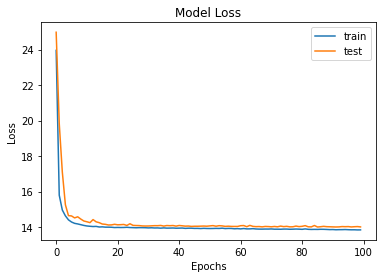

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
encoded_data = encoder.predict(x_test)
decoded_data = decoder.predict(encoded_data)

In [ ]:
encoded_data

array([[-16.085644  ,   0.39667585, -19.771702  , ..., -15.533896  ,
         -3.8128948 , -18.3268    ],
       [ -7.6604295 ,  -4.8623095 , -19.725351  , ...,  -7.8025055 ,
         -2.8861432 , -30.67173   ],
       [ -7.4012804 ,  -3.522519  , -12.51906   , ...,  -7.610981  ,
         -1.4146305 ,   4.804625  ],
       ...,
       [-19.270063  ,  -2.1692202 ,   8.530966  , ..., -23.788795  ,
         -1.8469787 , -46.67868   ],
       [-22.872232  ,   5.667755  , -32.57489   , ..., -17.2343    ,
          7.0364203 , -23.15659   ],
       [-58.96264   ,   8.525563  ,   2.8996542 , ..., -39.01218   ,
         12.51543   , -52.939976  ]], dtype=float32)

In [ ]:
decoded_data.shape

(3509, 60, 60, 3)

In [ ]:
x_test.shape

(3509, 60, 60, 3)

In [ ]:
def visualize(img,encoder,decoder): 
    """Draws original, encoded and decoded images""" 
    code = encoder.predict(img[None])[0] # img[None] is the same as img[np.newaxis, :] 
    reco = decoder.predict(code[None])[0] 
    plt.subplot(1,3,1) 
    plt.title("Original") 
    show_image(img) 
    plt.subplot(1,3,2) 
    plt.title("Code") 
    plt.imshow(code.reshape([code.shape[-1]//2,-1])) 
    plt.subplot(1,3,3) 
    plt.title("Reconstructed") 
    show_image(reco) 
    plt.show() 

def show_image(x): 
    plt.imshow(np.clip(x + 0.5, 0, 1)) 
    reconstruction_mse = vae.evaluate(x_test, x_test, verbose=0) 
    print("Convolutional autoencoder MSE:", reconstruction_mse) 
    

Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.005492210388184


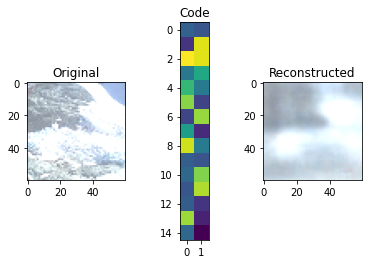

Convolutional autoencoder MSE: 14.005495071411133
Convolutional autoencoder MSE: 14.00549030303955


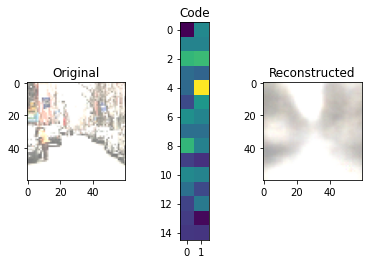

Convolutional autoencoder MSE: 14.005489349365234
Convolutional autoencoder MSE: 14.005494117736816


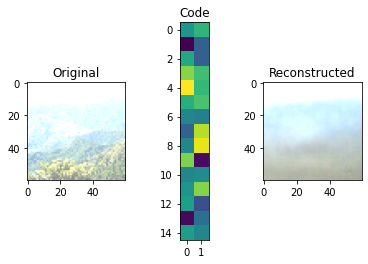

Convolutional autoencoder MSE: 14.005496978759766
Convolutional autoencoder MSE: 14.00549030303955


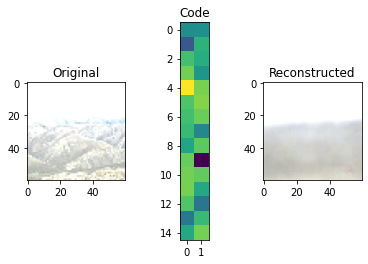

Convolutional autoencoder MSE: 14.005497932434082
Convolutional autoencoder MSE: 14.005491256713867


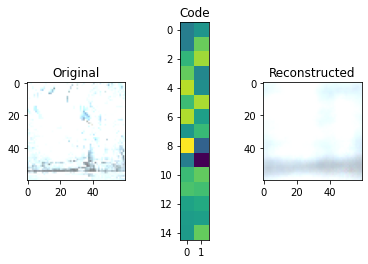

In [ ]:
import random

for _ in range(5): 
    img = x_test[random.randrange(0, x_test.shape[0])] 
    visualize(img,encoder,decoder)

In [ ]:
images = x_train 
codes = encoder.predict(images) 
from sklearn.neighbors import NearestNeighbors 

nei_clf = NearestNeighbors(metric="euclidean") 
nei_clf.fit(codes) 
def get_similar(image, n_neighbors=5): 
    assert image.ndim==3,"image must be [batch,height,width,3]" 
    code = encoder.predict(image[None]) 
    (distances,),(idx,) = nei_clf.kneighbors(code,n_neighbors=n_neighbors) 
    return distances,images[idx] 

def show_similar(image): 
    distances,neighbors = get_similar(image,n_neighbors=3) 
    plt.figure(figsize=[8,7]) 
    plt.subplot(1,4,1) 
    show_image(image) 
    plt.title("Original image") 
    for i in range(3): 
        plt.subplot(1,4,i+2) 
        show_image(neighbors[i]) 
        plt.title("Dist=%.3f"%distances[i]) 
    plt.show()


Convolutional autoencoder MSE: 14.005495071411133
Convolutional autoencoder MSE: 14.005483627319336
Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.005492210388184


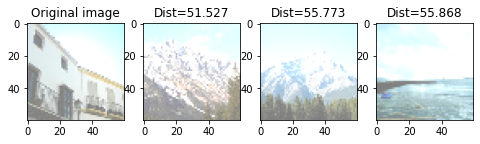

Convolutional autoencoder MSE: 14.00549602508545
Convolutional autoencoder MSE: 14.005492210388184
Convolutional autoencoder MSE: 14.005492210388184
Convolutional autoencoder MSE: 14.00549030303955


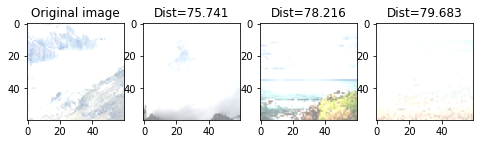

Convolutional autoencoder MSE: 14.005488395690918
Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.005492210388184
Convolutional autoencoder MSE: 14.005491256713867


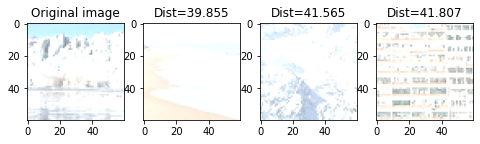

Convolutional autoencoder MSE: 14.005488395690918
Convolutional autoencoder MSE: 14.005494117736816
Convolutional autoencoder MSE: 14.005488395690918
Convolutional autoencoder MSE: 14.005488395690918


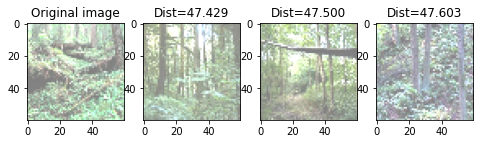

Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.005494117736816
Convolutional autoencoder MSE: 14.005491256713867


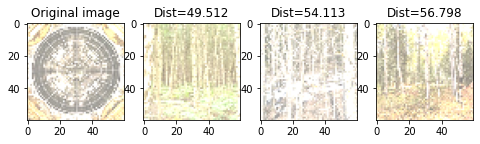

Convolutional autoencoder MSE: 14.00549602508545
Convolutional autoencoder MSE: 14.005494117736816
Convolutional autoencoder MSE: 14.005485534667969
Convolutional autoencoder MSE: 14.005488395690918


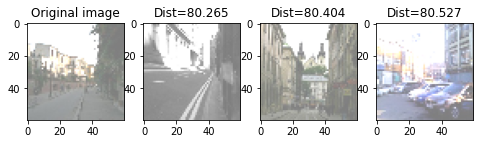

Convolutional autoencoder MSE: 14.005492210388184
Convolutional autoencoder MSE: 14.005492210388184
Convolutional autoencoder MSE: 14.005495071411133
Convolutional autoencoder MSE: 14.005491256713867


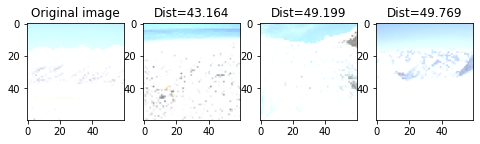

Convolutional autoencoder MSE: 14.005491256713867
Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.005488395690918
Convolutional autoencoder MSE: 14.005488395690918


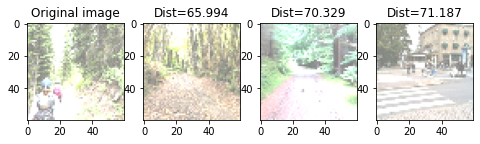

Convolutional autoencoder MSE: 14.005492210388184
Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.005485534667969
Convolutional autoencoder MSE: 14.005489349365234


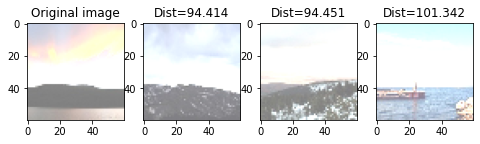

Convolutional autoencoder MSE: 14.005495071411133
Convolutional autoencoder MSE: 14.005495071411133
Convolutional autoencoder MSE: 14.00549030303955
Convolutional autoencoder MSE: 14.005489349365234


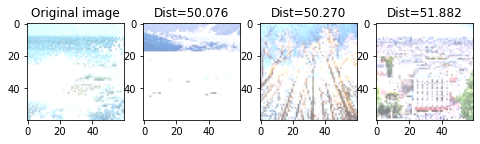

In [ ]:
import random
for _ in range(10):
    show_similar(x_test[random.randrange(0, x_test.shape[0])])